In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\Bright\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


###### A portfolio is just a collection of individually selected companies(assets) 

In [2]:
tickers =['PG', 'MSFT', 'F', 'GE']
my_data = pd.DataFrame()

for t in tickers:
    my_data[t] = wb.DataReader(t, data_source='yahoo', start='1995-1-1')['Adj Close']

In [3]:
my_data

,PG,MSFT,F,GE
Date,,,,
1995-01-03,6.320252,2.413537,3.256691,2.729230
1995-01-04,6.269589,2.431082,3.344314,2.729230
1995-01-05,6.180927,2.390982,3.315107,2.735919
1995-01-06,6.193593,2.431082,3.315107,2.722540
1995-01-09,6.168259,2.416045,3.373522,2.695783
...,...,...,...,...
2020-04-21,118.887138,167.820007,4.770000,6.480000
2020-04-22,118.609001,173.520004,4.770000,6.430000
2020-04-23,119.400002,171.419998,4.890000,6.520000


###### Normalisation to 100

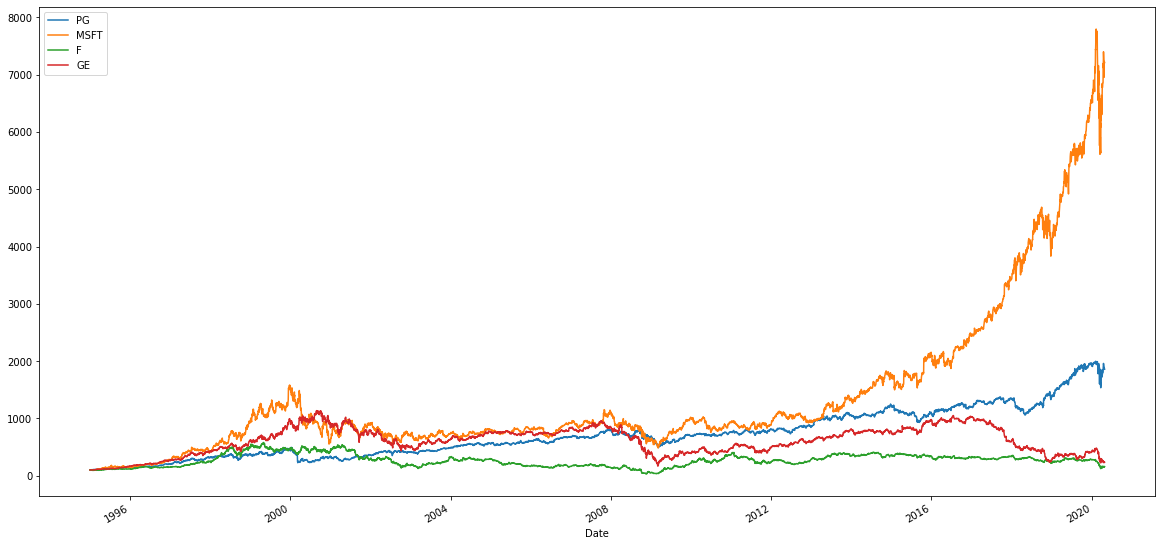

In [4]:
(my_data / my_data.iloc[0] * 100).plot(figsize=(20, 10))
plt.show()

##### Calculate the returns for each stock

In [5]:
returns = (my_data / my_data.shift(1)) - 1


returns.head(10)

,PG,MSFT,F,GE
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,-0.008016,0.007269,0.026906,0.000000
1995-01-05,-0.014142,-0.016495,-0.008733,0.002451
1995-01-06,0.002049,0.016771,0.000000,-0.004890
1995-01-09,-0.004090,-0.006185,0.017621,-0.009828
1995-01-10,0.012320,0.012448,-0.017316,0.007444
1995-01-11,-0.002028,0.006148,0.000000,0.014778
1995-01-12,0.010163,-0.002037,-0.008811,-0.002427
1995-01-13,0.029229,0.024490,0.017778,0.012166


###### Assign weights 

In [6]:
weights = np.array([0.25, 0.25, 0.25, 0.25])

In [11]:
annual_returns = returns.mean() * 250      # the number of trading days in a year

annual_returns

PG      0.140632
MSFT    0.217987
F       0.097340
GE      0.082903
dtype: float64

In [12]:
np.dot(weights, annual_returns)

0.13471551268699683

In [13]:
pfolio = str(round(np.dot(annual_returns, weights), 3) * 100) + ' %'
             
print(pfolio)

13.5 %
